# Cel: maksymalizacja funkcji

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

Funkcja którą chcemy maksymalizować: f(x) = -0.1*x^4 + 0.8*x^3 - x^2 + 5*sin(2*x) + 3*cos(x) + 20

In [15]:
def fx(x):
    return -0.1*x**4 + 0.8*x**3 - x**2 + 5*math.sin(2*x) + 3*math.cos(x) + 20

Wyświetlmy wykres

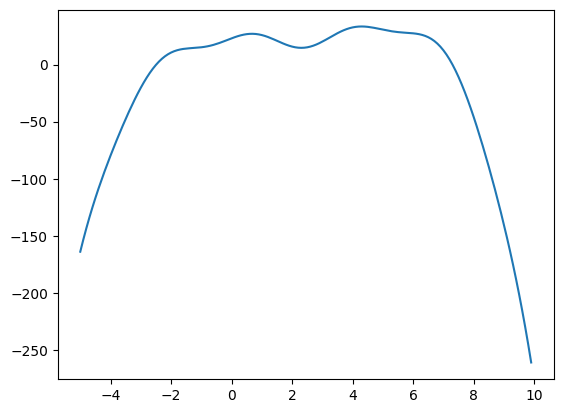

In [16]:
zakres = np.arange(-5, 10,step=0.1)
plt.plot(zakres,[fx(x) for x in zakres])

Ustawmy parametry:

In [23]:
p = 30 # liczba populacji
n = 100 # liczba pokolen
r = 10 # liczba bitów na jednego osobnika
pm = 0.01 # prawdopodobieństwo mutacji
current_n = 1 # bierzące pokolenie

Wykorzystujemy kodowania logarytmicznego, aby zamieniać postać binarną do liczby zmiennoprzecinkowej

In [18]:
def kodowanie(bin):
    znak_l = c[0]
    znak_w = c[1]
    suma = 0
    for i in range(2,r):
        suma += c[i] * 2**(r - i - 1)
    return (-1)**znak_l * (np.e**(-1)**(znak_w))*s

Losujemy początkową populację

In [19]:
def początkowa_populacja():
    pop = []
    for i in range(p):  # dla p osobników i r genów losujemy z 50% pstwem czy bit ma 0 czy 1
        pop.append([int(np.random.random()<0.5) for _ in range(r)])

Ocena: Wykorzystujemy powyżej przedstawione kodowanie, po czym podstawiamy osiągnietą wartość
do funkcji f(x)

In [20]:
def ocena(b):
    oceny = []
    for i in b:
        flt = kodowanie(i)
        oceny.append(float(fx(flt)))
    return oceny

Warunek stopu: zatrzymujemy algorytm jeśli
1. liczba pokoleń przekroczy ustaloną wartość
2. różnica ocen w populacji jest wystarczająco mała

In [24]:
def stop(Fx_pop,e,n):
    if max(Fx_pop) - min(Fx_pop) <= e or current_n >= n:
        return True
    return False
